In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

## When will we see BOE

In [2]:

ice = pd.read_csv('ice.csv.bz2', sep = '\t')
ice = ice[ice['region'] == 'N']
ice.isna().sum()

ice[ice["extent"] < 0]

ice = ice.drop([218,220])

# loaded data and keep only the northern hemisphere, drop the extreme extent data

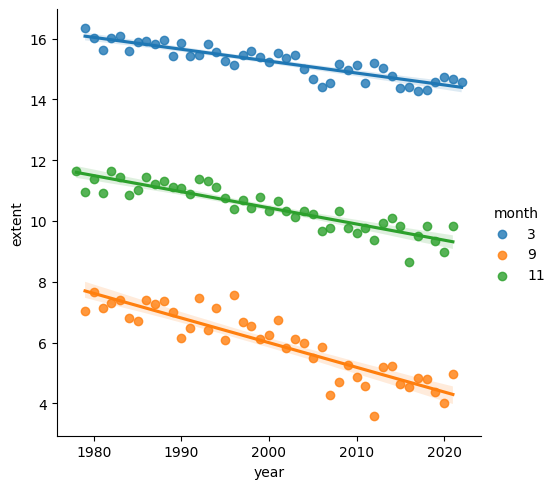

In [3]:
temp = ice[(ice.month == 9) | (ice.month == 3) | (ice.month == 11)].copy()


_ = sns.lmplot(y = "extent", x = 'year',hue = 'month', data=temp)


# it seems like March always has the highest extent

In [4]:
temp_sep = temp[temp.month == 9].copy()

m = smf.ols('extent ~ year', data = temp_sep).fit()
m.summary()

# extent = b0 + b1 * year 

NameError: name 'smf' is not defined

In [ ]:
# the slope mean that year increase, the extent will decrease by 0.0811 unit
# the p value is 0 and it falls outside of the 95% confidence interval,
# therefore it is  statistically significant

In [ ]:
temp_sep['relative_year'] = temp_sep['year'] - 2000
m = smf.ols('extent ~ relative_year', data = temp_sep).fit()
m.summary()

# a): it means that in year 0, the extent will be 168.2503 
#  it has a p value of 0, which makes it statistically significant
# b): it means that in year 2000, the extent should be 5.9942
#  it has a p value of 0, which makes it statistically significant


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 extent   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     156.6
Date:                Sun, 10 Jul 2022   Prob (F-statistic):           1.38e-15
Time:                        00:55:42   Log-Likelihood:                -32.490
No. Observations:                  43   AIC:                             68.98
Df Residuals:                      41   BIC:                             72.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.9942      0.080     74.510      0.000       5.832       6.157
relative_year    -0.0811      0.006    -12.515      0.000      -0.094      -0.068
==============================================================================
Omnibus:                        2.538   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                1.495
Skew:                          -0.321   Prob(JB):                        0.474
Kurtosis:                       3.649   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

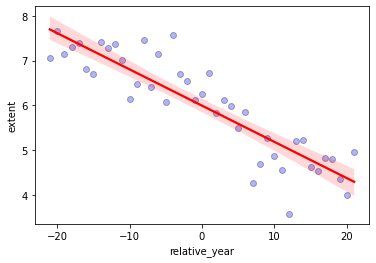

In [ ]:

_ = sns.regplot(y = "extent", x = 'relative_year',
scatter_kws = {"color":"blue", "alpha":0.3, "edgecolor":"black"},
line_kws={"color":"red"},
data=temp_sep)

# the trend is that the extend is decreasing as the year increase
# I do not see a clear acceleration for the trend but there is a little bit 
# of deceleration at the end

In [ ]:
# 7):

m = smf.ols('relative_year ~ extent', data = temp_sep).fit()
m.summary()

# according the prediction, the trend line will hit 0 at year 2058
# which is 26 years from 2022


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          relative_year   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     156.6
Date:                Sun, 10 Jul 2022   Prob (F-statistic):           1.38e-15
Time:                        00:55:42   Log-Likelihood:                -135.49
No. Observations:                  43   AIC:                             275.0
Df Residuals:                      41   BIC:                             278.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     58.5562      4.762     12.298      0.000      48.940      68.172
extent        -9.7688      0.781    -12.515      0.000     -11.345      -8.192
==============================================================================
Omnibus:                        0.897   Durbin-Watson:                   1.374
Prob(Omnibus):                  0.639   Jarque-Bera (JB):                0.914
Skew:                          -0.196   Prob(JB):                        0.633
Kurtosis:                       2.403   Cond. No.                         33.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
temp_mar = temp[temp.month == 3].copy()
temp_mar['relative_year'] = temp_mar['year'] - 2000

m = smf.ols('relative_year ~ extent', data = temp_mar).fit()
m.summary()

# according the March data, we will reach BOE in 311 years

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          relative_year   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     167.3
Date:                Sun, 10 Jul 2022   Prob (F-statistic):           3.05e-16
Time:                        00:55:42   Log-Likelihood:                -138.92
No. Observations:                  44   AIC:                             281.8
Df Residuals:                      42   BIC:                             285.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    311.8218     24.082     12.949      0.000     263.223     360.421
extent       -20.4249      1.579    -12.936      0.000     -23.611     -17.239
==============================================================================
Omnibus:                        1.701   Durbin-Watson:                   1.205
Prob(Omnibus):                  0.427   Jarque-Bera (JB):                1.165
Skew:                          -0.089   Prob(JB):                        0.558
Kurtosis:                       2.223   Cond. No.                         420.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""